## Diamond Price Prediction Problem

This is a simple case of predicting the price of diamonds based on a set of features. I will take the following steps to solve this problem:

- Identify the key features that can be good independent variables for prediction of price
- Train a simple LR model with the most correlated feature
- Extend to multiple features with multi-variable linear regression

In [2]:
# Step 1: Finding the features
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [4]:
# Loading the dataset
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53941 entries, 0 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53941 non-null  float64
 1   cut      53941 non-null  object 
 2   color    53941 non-null  object 
 3   clarity  53941 non-null  object 
 4   depth    53941 non-null  float64
 5   table    53941 non-null  float64
 6   price    53941 non-null  int64  
 7   x        53941 non-null  float64
 8   y        53941 non-null  float64
 9   z        53941 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,depth,table,price,x,y,z
count,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000
mean,0.797953,61.749447,57.457231,3932.885875,5.731183,5.734554,3.538753
std,0.474016,1.432641,2.234497,3989.452937,1.121767,1.142143,0.705707
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Start with just the numberical features
numerical_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


<Figure size 1000x800 with 0 Axes>

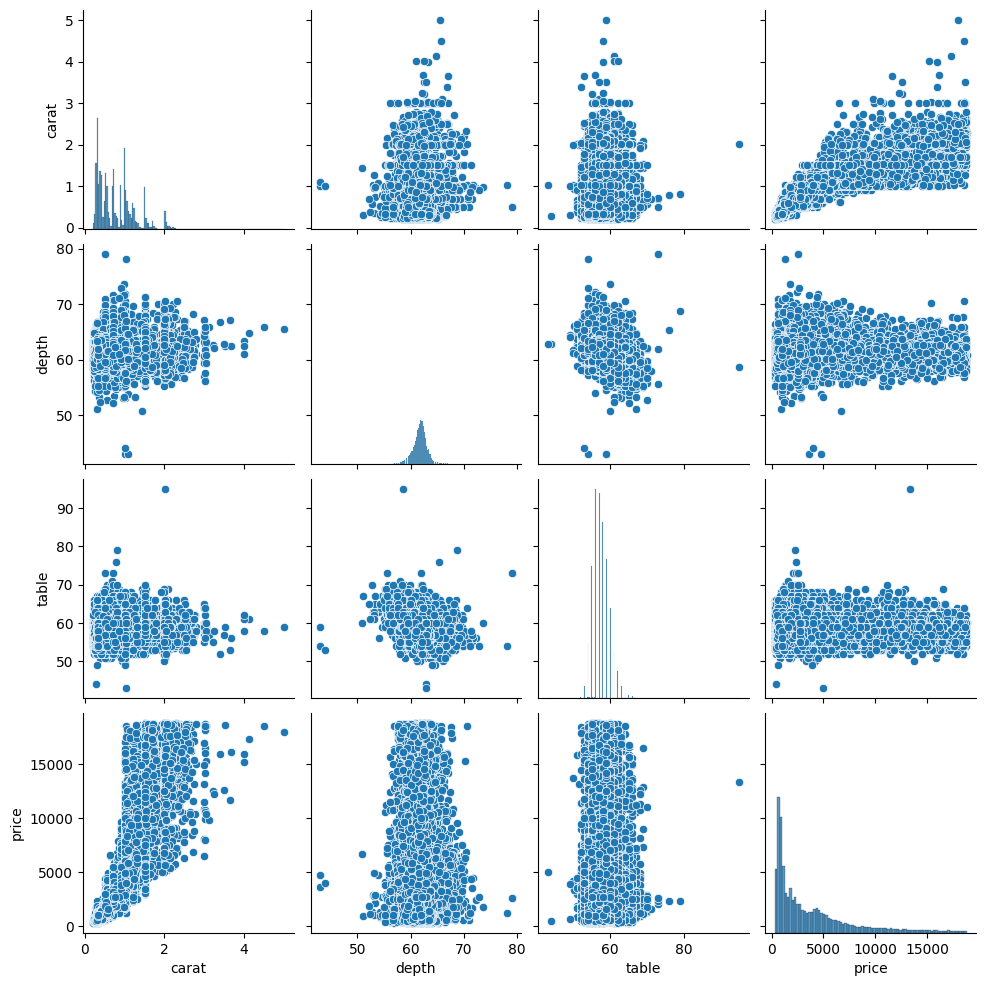

In [9]:
# Exclude x , y , z as they are dimensions
numerical_features.remove('x')
numerical_features.remove('y')
numerical_features.remove('z')
plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_features])
plt.show()

**Obsersvation**: Carat has a directly propotional relation with the price of diamond. Lets see the correlation

In [ ]:
df[numerical_features].corr()
# As suspected, carat has the highest correlation with price

,carat,depth,table,price
carat,1.000000,0.028266,0.181643,0.921593
depth,0.028266,1.000000,-0.295735,-0.010613
table,0.181643,-0.295735,1.000000,0.127155
price,0.921593,-0.010613,0.127155,1.000000


### Lets train a simple LR model with carat
We will include bias so it means we will find $w$ in $y = xw +b$

In [12]:
from sklearn.model_selection import train_test_split    
X = sm.add_constant(df[['carat']]) # for bias term
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
diamond_price_model = sm.OLS(Y_train, X_train)
final_model = diamond_price_model.fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.424e+05
Date:                Sun, 16 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:04:08   Log-Likelihood:            -3.7814e+05
No. Observations:               43152   AIC:                         7.563e+05
Df Residuals:                   43150   BIC:                         7.563e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2241.3234     14.579   -153.740      0.0

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Predicting on test set
Y_pred = final_model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error:", sqrt(mean_squared_error(Y_test, Y_pred))) # RMSE Suggests that we have outliers that are increasing the error.
print("R^2 Score:", r2_score(Y_test, Y_pred))

Mean Absolute Error: 1007.8648967279004
Mean Squared Error: 1554.6382364747549
R^2 Score: 0.8510119320661724
